----
#**Convolutional Neural Network: Distinguishing Horses from Zebras**

**Abstract**

*This project utilizes a Convolutional Neural Network (CNN) to discern horses from zebras in images. Employing Google Colab, the dataset is accessed via Google Drive. Data preprocessing and data augmentation are key steps. The CNN architecture includes convolutional and pooling layers, achieving promising results in 20 epochs. The model is then tested on six images, three horses, and three zebras, confirming its effectiveness in binary image classification. This project provides a practical example of CNN implementation for those interested in similar deep learning endeavors.*


**Technologies**

*TensorFlow, Keras, ImageDataGenerator, Python, OpenCV, Matplotlib, Numpy.*


----

### Importing the libraries

*Import TensorFlow, the Keras image data generator, and other necessary libraries.*

In [49]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [50]:
tf.__version__

'2.12.0'

*Mounting  Google Drive to access the dataset.*

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/horseZebraDataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2401 images belonging to 2 classes.


### Preprocessing the Test set

In [53]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/horseZebraDataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 260 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [54]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [56]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [58]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [59]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [60]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [61]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [62]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
76/76 [==============================] - 29s 354ms/step - loss: 0.5625 - accuracy: 0.6968 - val_loss: 0.8064 - val_accuracy: 0.6615
Epoch 2/20
76/76 [==============================] - 28s 370ms/step - loss: 0.3883 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.7846
Epoch 3/20
76/76 [==============================] - 32s 412ms/step - loss: 0.3193 - accuracy: 0.8567 - val_loss: 0.4037 - val_accuracy: 0.8538
Epoch 4/20
76/76 [==============================] - 26s 339ms/step - loss: 0.2900 - accuracy: 0.8776 - val_loss: 0.5039 - val_accuracy: 0.8077
Epoch 5/20
76/76 [==============================] - 27s 348ms/step - loss: 0.2896 - accuracy: 0.8813 - val_loss: 1.0505 - val_accuracy: 0.6692
Epoch 6/20
76/76 [==============================] - 28s 361ms/step - loss: 0.2788 - accuracy: 0.8801 - val_loss: 0.5255 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 25s 322ms/step - loss: 0.2734 - accuracy: 0.8859 - val_loss: 0.3992 - val_accuracy: 0.8692

*The results show that the model's performance improves with each epoch, as indicated by a decrease in loss and an increase in accuracy on the validation dataset. By the end of training, the model achieves an accuracy of approximately 89.62% on the validation set, signifying its capability to effectively classify images of horses and zebras. This demonstrates the successful training of the CNN for binary image classification.*

## Part 4 - Making a single prediction

In [84]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

test_image = image.load_img('/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_690.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'


1/1 [==============================] - 0s 27ms/step


In [85]:
print(prediction)

horse


# Part 5 - Other Predictions

In [86]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

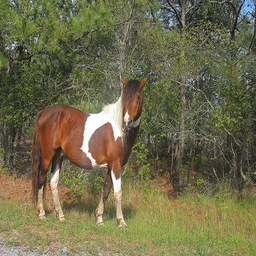

1/1 [==============================] - 0s 24ms/step
horse


In [88]:
# Image 1

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1420.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1420.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'

print(prediction)

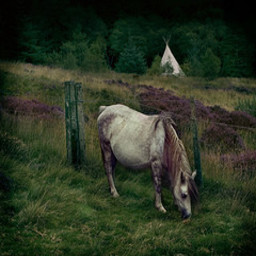

1/1 [==============================] - 0s 36ms/step
horse


In [89]:
# Image 2

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1690.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1690.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'

print(prediction)

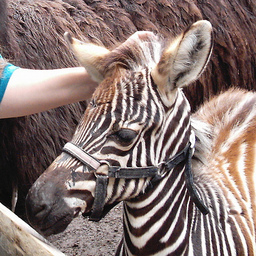

1/1 [==============================] - 0s 27ms/step
horse


In [90]:
# Image 3

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_6690.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_6690.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'

print(prediction)

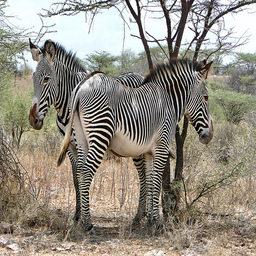

1/1 [==============================] - 0s 23ms/step
horse


In [91]:
# Image 4

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_9740.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_9740.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'


print(prediction)

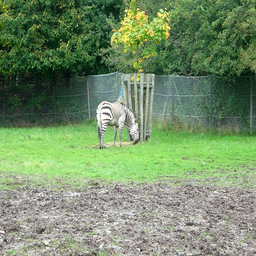

1/1 [==============================] - 0s 33ms/step
zebra


In [92]:
# Image 5

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_130.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/zebra/n02391049_130.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'


print(prediction)

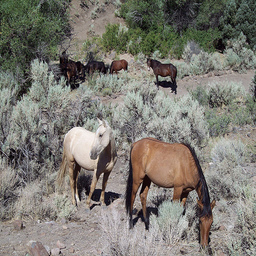

1/1 [==============================] - 0s 93ms/step
horse


In [101]:
# Image 6

img = cv2.imread("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1830.jpg",1)
cv2_imshow(img)

test_image = image.load_img("/content/gdrive/MyDrive/horseZebraDataset/test_set/horse/n02381460_1830.jpg", target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'horse'
else:
  prediction = 'zebra'

print(prediction)
